In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('train_quora.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df = df.sample(10000,random_state=365)

In [5]:
df

,id,qid1,qid2,question1,question2,is_duplicate
40217,40217,898,15625,How we can travel faster than light?,What happens if you travel faster than the spe...,0
239061,239061,350578,350579,What stocks should I short if I expect a Trump...,Donald Trump has gained a surprising amount of...,0
248482,248482,361925,361926,Which is a best PG course in civil engineering...,Which is the best PG course for a civil engineer?,0
334237,334237,461406,461407,How do I find odd jobs in countries like Austr...,How can Internet access radically change lives?,0
111062,111062,181994,181995,How can I invest in mutual funds in India from...,How do I invest in mutual funds in India?,0
...,...,...,...,...,...,...
213395,213395,318702,318703,What are the characteristics of the sign Scorp...,What are the characteristics of the zodiac sig...,1
300782,300782,423610,423611,"Which will be better in canada, architecture t...",What effective konwledge do you have?,0
305304,305304,428682,428683,Do females ejaculate?,Do women really ejaculate?,1
146862,146862,231903,231904,Why do some dogs love chewing ice?,Why do dogs love ice?,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 40217 to 209591
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10000 non-null  int64 
 1   qid1          10000 non-null  int64 
 2   qid2          10000 non-null  int64 
 3   question1     10000 non-null  object
 4   question2     10000 non-null  object
 5   is_duplicate  10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [11]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

0    6292
1    3708
Name: is_duplicate, dtype: int64
37.08
62.92


<AxesSubplot:>

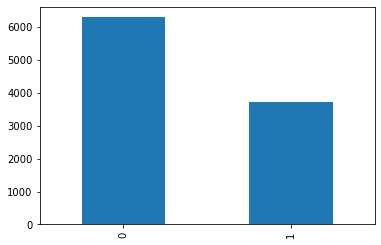

In [12]:
print(df['is_duplicate'].value_counts())
print((df[df['is_duplicate']==1].shape[0]/df.shape[0])*100)
print((df[df['is_duplicate']==0].shape[0]/df.shape[0])*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('No of unique questions:',np.unique(qid).shape[0])
x= qid.value_counts()>1
print('No of questions repeated:',x[x].shape[0])

No of unique questions: 19394
No of questions repeated: 538


In [14]:
import matplotlib.pyplot as plt

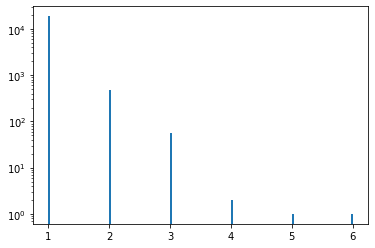

In [15]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [16]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [17]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [18]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
40217,40217,898,15625,how we can travel faster than light,what happens if you travel faster than the spe...,0,35,57,7,11
239061,239061,350578,350579,what stocks should i short if i expect a trump...,donald trump has gained a surprising amount of...,0,50,118,11,23
248482,248482,361925,361926,which is a best pg course in civil engineering...,which is the best pg course for a civil engineer,0,55,48,11,10
334237,334237,461406,461407,how do i find odd jobs in countries like austr...,how can internet access radically change lives,0,66,46,13,7
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9
...,...,...,...,...,...,...,...,...,...,...
213395,213395,318702,318703,what are the characteristics of the sign scorp...,what are the characteristics of the zodiac sig...,1,73,55,13,9
300782,300782,423610,423611,which will be better in canada architecture t...,what effective konwledge do you have,0,80,36,12,6
305304,305304,428682,428683,do females ejaculate,do women really ejaculate,1,20,25,3,4
146862,146862,231903,231904,why do some dogs love chewing ice,why do dogs love ice,1,33,20,7,5


In [19]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ") ))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ") ))   
    return len(w1 & w2)

In [20]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ") ))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ") ))   
    return (len(w1) + len(w2))

In [21]:
df['common_word'] = df.apply(common_words,axis=1)

In [22]:
df['total_word'] = df.apply(total_words,axis=1)

In [23]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_word
40217,40217,898,15625,how we can travel faster than light,what happens if you travel faster than the spe...,0,35,57,7,11,4,18
239061,239061,350578,350579,what stocks should i short if i expect a trump...,donald trump has gained a surprising amount of...,0,50,118,11,23,4,30
248482,248482,361925,361926,which is a best pg course in civil engineering...,which is the best pg course for a civil engineer,0,55,48,11,10,7,20
334237,334237,461406,461407,how do i find odd jobs in countries like austr...,how can internet access radically change lives,0,66,46,13,7,1,20
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,7,18
...,...,...,...,...,...,...,...,...,...,...,...,...
213395,213395,318702,318703,what are the characteristics of the sign scorp...,what are the characteristics of the zodiac sig...,1,73,55,13,9,7,20
300782,300782,423610,423611,which will be better in canada architecture t...,what effective konwledge do you have,0,80,36,12,6,0,17
305304,305304,428682,428683,do females ejaculate,do women really ejaculate,1,20,25,3,4,2,7
146862,146862,231903,231904,why do some dogs love chewing ice,why do dogs love ice,1,33,20,7,5,5,12


In [24]:
df['word_share'] = round(df['common_word'] / df['total_word'],2)

In [25]:
import seaborn as sns

Minimun length 7
Maximun length 290
Mean length 58.5939


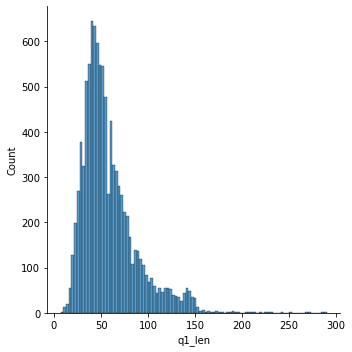

In [26]:
sns.displot(df['q1_len'])
print('Minimun length',df['q1_len'].min())
print('Maximun length',df['q1_len'].max())
print('Mean length',df['q1_len'].mean())

Minimun length 10
Maximun length 418
Mean length 59.2569


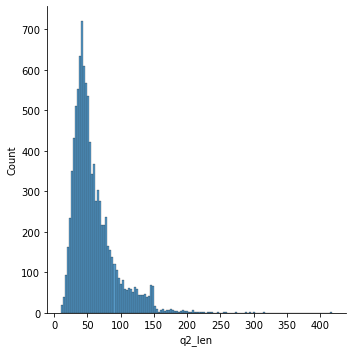

In [27]:
sns.displot(df['q2_len'])
print('Minimun length',df['q2_len'].min())
print('Maximun length',df['q2_len'].max())
print('Mean length',df['q2_len'].mean())

Minimun words 1
Maximun words 60
Mean words 11.5094


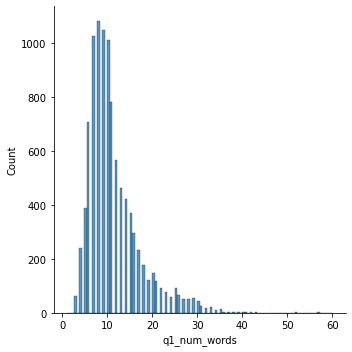

In [28]:
sns.displot(df['q1_num_words'])
print('Minimun words',df['q1_num_words'].min())
print('Maximun words',df['q1_num_words'].max())
print('Mean words',df['q1_num_words'].mean())

Minimun words 2
Maximun words 83
Mean words 11.7748


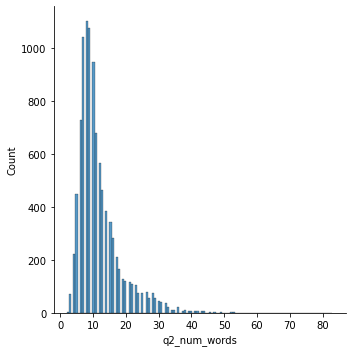

In [29]:
sns.displot(df['q2_num_words'])
print('Minimun words',df['q2_num_words'].min())
print('Maximun words',df['q2_num_words'].max())
print('Mean words',df['q2_num_words'].mean())

/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


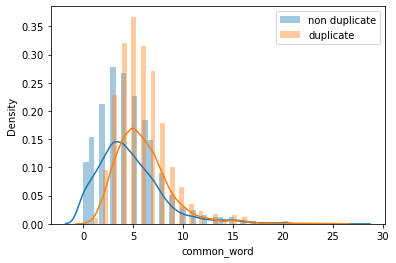

In [30]:
# common words
sns.distplot(df[df['is_duplicate']==0]['common_word'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['common_word'],label = 'duplicate')
plt.legend()
plt.show()

/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


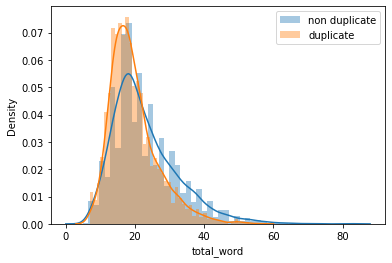

In [31]:
sns.distplot(df[df['is_duplicate']==0]['total_word'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['total_word'],label = 'duplicate')
plt.legend()
plt.show()

/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


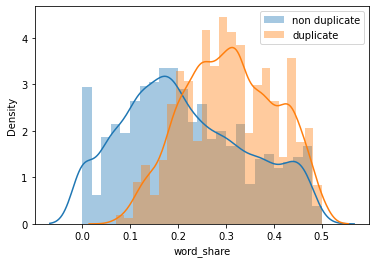

In [32]:
sns.distplot(df[df['is_duplicate']==0]['word_share'],label ='non duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label = 'duplicate')
plt.legend()
plt.show()

In [33]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'common_word',
       'total_word', 'word_share'],
      dtype='object')

In [34]:
# temp_df

In [35]:
# new_df

## Token Features

In [36]:
# 1. cwc_min = no.of common words /min(words(q1,q2))
# 2. cwc_max = no.of common words /max(words(q1,q2))
# 3. csc_min = no.of common stopwords / min(stopwords(q1,q2))
# 4. csc_max = no.of common stopwords / max(stopwords(q1,q2))
# 5. ctc_min = no.of common tokens / min(tokens(q1,q2))
# 6. ctc_max = no.of common tokens / max(tokens(q1,q2))
# 7.last_word_equal =  1 if last word of both sentences are equal
# 8.first_word_equal =  1 if first word of both sentences are equal

In [37]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [38]:
token_features = df.apply(fetch_token_features, axis=1)
df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

## Length Based Features

In [39]:
# 1. Mean of the length of two features
# 2. abs_length_diff
# 3. longest_substr_ratio - ratio of longest substring to length of smaller question

In [40]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    


In [41]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

## Fuzzy Features

In [42]:
# fuzz rartio 
# fuzz_partial_ratio
# token_sort_ratio
# token_set_ratio

In [43]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


/Users/aayushaggarwal/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [44]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [45]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
40217,40217,898,15625,how we can travel faster than light,what happens if you travel faster than the spe...,0,35,57,7,11,...,0.363633,1,0,4,9.0,0.555556,59,63,61,81
239061,239061,350578,350579,what stocks should i short if i expect a trump...,donald trump has gained a surprising amount of...,0,50,118,11,23,...,0.181817,0,0,11,16.5,0.137255,30,48,46,55
248482,248482,361925,361926,which is a best pg course in civil engineering...,which is the best pg course for a civil engineer,0,55,48,11,10,...,0.636358,0,1,1,10.5,0.326531,78,83,80,84
334237,334237,461406,461407,how do i find odd jobs in countries like austr...,how can internet access radically change lives,0,66,46,13,7,...,0.076922,0,1,6,10.0,0.085106,30,37,38,34
111062,111062,181994,181995,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india,0,55,40,11,9,...,0.636358,0,1,2,10.0,0.829268,80,92,82,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213395,213395,318702,318703,what are the characteristics of the sign scorp...,what are the characteristics of the zodiac sig...,1,73,55,13,9,...,0.583328,0,1,3,10.5,0.642857,75,87,76,93
300782,300782,423610,423611,which will be better in canada architecture t...,what effective konwledge do you have,0,80,36,12,6,...,0.000000,0,0,5,8.5,0.135135,24,31,26,29
305304,305304,428682,428683,do females ejaculate,do women really ejaculate,1,20,25,3,4,...,0.499988,1,1,1,3.5,0.476190,71,70,76,76
146862,146862,231903,231904,why do some dogs love chewing ice,why do dogs love ice,1,33,20,7,5,...,0.714276,1,1,2,6.0,0.523810,75,75,75,100


In [46]:
# assert 1==0

In [47]:
ques_df = df[['question1','question2']]
ques_df

,question1,question2
40217,how we can travel faster than light,what happens if you travel faster than the spe...
239061,what stocks should i short if i expect a trump...,donald trump has gained a surprising amount of...
248482,which is a best pg course in civil engineering...,which is the best pg course for a civil engineer
334237,how do i find odd jobs in countries like austr...,how can internet access radically change lives
111062,how can i invest in mutual funds in india from...,how do i invest in mutual funds in india
...,...,...
213395,what are the characteristics of the sign scorp...,what are the characteristics of the zodiac sig...
300782,which will be better in canada architecture t...,what effective konwledge do you have
305304,do females ejaculate,do women really ejaculate
146862,why do some dogs love chewing ice,why do dogs love ice


In [48]:
new_df = df.drop(['id', 'qid1', 'qid2', 'question1', 'question2'],axis=1)
new_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_word,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
40217,0,35,57,7,11,4,18,0.22,0.999967,0.599988,...,0.363633,1,0,4,9.0,0.555556,59,63,61,81
239061,0,50,118,11,23,4,30,0.13,0.399992,0.181817,...,0.181817,0,0,11,16.5,0.137255,30,48,46,55
248482,0,55,48,11,10,7,20,0.35,0.799984,0.666656,...,0.636358,0,1,1,10.5,0.326531,78,83,80,84
334237,0,66,46,13,7,1,20,0.05,0.000000,0.000000,...,0.076922,0,1,6,10.0,0.085106,30,37,38,34
111062,0,55,40,11,9,7,18,0.39,0.999975,0.799984,...,0.636358,0,1,2,10.0,0.829268,80,92,82,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213395,1,73,55,13,9,7,20,0.35,0.749981,0.599988,...,0.583328,0,1,3,10.5,0.642857,75,87,76,93
300782,0,80,36,12,6,0,17,0.00,0.000000,0.000000,...,0.000000,0,0,5,8.5,0.135135,24,31,26,29
305304,1,20,25,3,4,2,7,0.29,0.499975,0.333322,...,0.499988,1,1,1,3.5,0.476190,71,70,76,76
146862,1,33,20,7,5,5,12,0.42,0.999967,0.749981,...,0.714276,1,1,2,6.0,0.523810,75,75,75,100


In [49]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv  = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp_df1 = pd.DataFrame(q1_arr,index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index= ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)

In [51]:
new_df = pd.concat([new_df,temp_df],axis=1)

In [52]:
new_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_word,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
40217,0,35,57,7,11,4,18,0.22,0.999967,0.599988,...,1,0,0,0,0,0,0,0,0,0
239061,0,50,118,11,23,4,30,0.13,0.399992,0.181817,...,0,0,0,0,0,0,0,0,0,0
248482,0,55,48,11,10,7,20,0.35,0.799984,0.666656,...,0,0,0,0,0,0,0,0,0,0
334237,0,66,46,13,7,1,20,0.05,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
111062,0,55,40,11,9,7,18,0.39,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213395,1,73,55,13,9,7,20,0.35,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0
300782,0,80,36,12,6,0,17,0.00,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
305304,1,20,25,3,4,2,7,0.29,0.499975,0.333322,...,0,0,0,0,0,0,0,0,0,0
146862,1,33,20,7,5,5,12,0.42,0.999967,0.749981,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_df.iloc[:,1:].values,new_df.iloc[:,0].values,test_size=0.2,random_state =2)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.756

In [55]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [56]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [57]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [58]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [59]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [60]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [61]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [62]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [63]:
rf.predict(query_point_creator(q1,q3))

array([1])